# Project: Investigating a movie database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This database was extracted from the IMDB website which provides data for all movies from 1960 to 2015. It includes ratings data from the users and financial data related to a movie.
<br> Two questions will drive our analysis which are as follows:

> Question 1: Which genres are most popular from year to year?
> <br>Question 2: What is the proportion of movies making a profit?

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> Let's load the data first and visualize the first few line:

In [49]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Our first observation is that the 'genres' column will need to be stripped out as multiple genres are consolidated in one line.
<br>Next we will look for instances of missing or possibly errant data.

In [50]:
df.shape

(10866, 21)

> There are 10866 rows in this file and 21 columns.
<br>Let's analyse whether there are any missing data that need to be removed in order to answer the two questions for our project:

In [51]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> There are 23 rows for genres that are missing which should be removed to answer the first questions on our project.
<br> We should now identify whether there are any duplicates rows to remove them:

In [52]:
df[df.duplicated()==True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> One row appears to be duplicated in index 2090.
<br>Next we will look at the data types of the variables that will be used in our analysis:

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> We will convert the budget and revenue columns to float. We will not be taking the inflation-adjusted budget and revenue columns as we want to determine whether a movie was profitable when it was released.

> Finally let's dig into the numerical data and statistics:

In [54]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> We can see from the above table that there are a number of movies where the budget was not disclosed. Alternatively there could be movies with a budget but no revenue attached to it. We will have to remove all the lines with a nil budget or nil revenue to answer question 2.

### Data Cleaning

> We will be working off two copies, one that will be used to answer question 1 and one for question 2.

In [55]:
df_q1 = df.copy()
df_qn = df.copy()

In [56]:
df_q1.shape

(10866, 21)

> For question 1 we will need to drop the duplicated lines and split the genre column that has multiple genres.

In [57]:
# Drop duplicated values
df_q1.drop((df_q1[df_q1.duplicated()==True]).index,axis=0,inplace=True)
df_q1.shape

(10865, 21)

In [58]:
# Split the 'genre' column
# Let's first isolate the rows with multiple genres
df_genres = df_q1[df_q1['genres'].str.contains('\|')==True]
# We will check what is the maximum number of lines per rows that will need to be splitted
df_genres['genres'].str.count('\|').max()

4

In [59]:
# We will take note of the number of rows of df_genres 
df_genres.shape

(8514, 21)

In [60]:
# We will make four copies to split them in 5
df_genres1 = df_genres[df_genres['genres'].str.count('\|')==1].copy()
df_genres2 = df_genres[df_genres['genres'].str.count('\|')==1].copy()
df_genres3 = df_genres[df_genres['genres'].str.count('\|')==2].copy()
df_genres4 = df_genres[df_genres['genres'].str.count('\|')==3].copy()
df_genres5 = df_genres[df_genres['genres'].str.count('\|')==4].copy()

In [61]:
# We can now split each line by genre into their respective DataFrame
df_genres1['genres'] = df_genres1['genres'].apply(lambda x: x.split('|')[0])
df_genres2['genres'] = df_genres2['genres'].apply(lambda x: x.split('|')[1])
df_genres3['genres'] = df_genres3['genres'].apply(lambda x: x.split('|')[2])
df_genres4['genres'] = df_genres4['genres'].apply(lambda x: x.split('|')[3])
df_genres5['genres'] = df_genres5['genres'].apply(lambda x: x.split('|')[4])

In [62]:
# All DataFrame are consolidated onto one
new_rows = df_genres1.append([df_genres2,df_genres3,df_genres4,df_genres5])

In [63]:
# Next we need to remove all line with a '|' sign in column 'genres' from the initial DataFrame
df_q1.drop(df_genres.index,axis=0,inplace=True)
df_q1.shape

(2351, 21)

In [64]:
# Let's add back the new rows to the initial DataFrame
df_q1_clean = df_q1.append(new_rows,ignore_index=True)

In [65]:
# Finally we can remove the blank 'genres' cells
df_q1_clean.drop(df_q1_clean[df_q1_clean['genres'].isnull()==True].index,axis=0,inplace=True)

In [66]:
# The total number of rows should now be 14278
df_q1_clean.shape

(14278, 21)

> Now we can start cleaning the second DataFrame that will be used for questions 2 and 3. We will have to remove the duplicated line, convert and clean up the budget and revenue lines.

In [67]:
# First we can remove the duplcate row as we did before
df_qn.drop((df_qn[df_qn.duplicated()==True]).index,axis=0,inplace=True)
df_qn.shape

(10865, 21)

In [68]:
# Let's convert the budget and revenue columns to float
df_qn['budget'] = df_qn['budget'].astype(float)
df_qn['revenue'] = df_qn['revenue'].astype(float)
df_qn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj           

> We must now remove all nil data from the budget and revenue columns

In [69]:
# After removing nil budget data there should be 5169 rows left
lines = df_qn[df_qn['budget']==0]
df_qn.drop(lines.index,axis=0,inplace=True)
df_qn.shape

(5169, 21)

In [70]:
# Let's apply the same process for the revenue column and we can check there are 3854 rows left
df_qn.drop(df_qn[df_qn['revenue']==0].index,axis=0,inplace=True)
df_qn.shape

(3854, 21)

In [71]:
# We can now verify that there are no nil data for the budget_adj and revenue_adj columns
df_qn[df_qn['budget_adj']==0].shape,df_qn[df_qn['revenue_adj']==0].shape

((0, 21), (0, 21))

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which genres are most popular from year to year?

In [72]:
# Let's first assess if we have got enough data since 1960
df_q1_clean.groupby(['genres'])['release_year'].nunique()

genres
Action             53
Adventure          53
Animation          39
Comedy             56
Crime              52
Documentary        42
Drama              56
Family             56
Fantasy            48
Foreign            31
History            48
Horror             56
Music              48
Mystery            52
Romance            56
Science Fiction    55
TV Movie           28
Thriller           55
War                53
Western            45
Name: release_year, dtype: int64

> We can see that some years are missing for most of the movies genres. We should filter the data to a more recent period starting from 2000.

In [73]:
df_q1_clean.query('release_year>1999').groupby(['genres'])['release_year'].nunique()

genres
Action             16
Adventure          16
Animation          16
Comedy             16
Crime              16
Documentary        16
Drama              16
Family             16
Fantasy            16
Foreign            13
History            15
Horror             16
Music              16
Mystery            16
Romance            16
Science Fiction    16
TV Movie           16
Thriller           16
War                16
Western            14
Name: release_year, dtype: int64

> Three genres are missing years which are Foreign, History and Western. We can address it by applying the mean for missing years.

In [74]:
# First let's group genres for each year per popularity
df_popularity = df_q1_clean.query('release_year>1999').groupby(['genres','release_year'])['popularity'].mean()

In [75]:
# Next we want to keep the types of movies with the highest popularity during that period for comparison
df_filter = df_q1_clean.query('release_year>1999').groupby(['genres'])['popularity'].mean()
df_filter.describe()

count    20.000000
mean      0.697504
std       0.293772
min       0.179682
25%       0.551329
50%       0.709137
75%       0.872652
max       1.320675
Name: popularity, dtype: float64

> We will select any movie type with a mean popularity greater than 75% distribution.

In [76]:
df_filter[df_filter>0.872652]

genres
Action             0.967121
Adventure          1.320675
Fantasy            1.067367
Science Fiction    0.986312
Western            0.904928
Name: popularity, dtype: float64

In [77]:
# Let's create an array for the years
year = np.arange(16)

In [78]:
# For 'Western' we need to add the mean data for each missing year. 
Mean_western = df_popularity['Western'].mean()
popularity_western = np.array(df_popularity['Western'])
popularity_western = np.insert(popularity_western,[2,8],Mean_western)
popularity_western = np.cumsum(popularity_western)

> The mean popularity for each genre is cumulated so that we will be able to determine which movie types have increased in popularity overtime.

In [79]:
# Let's make sure all years are now populated for 'Western'
len(popularity_western)

16

In [80]:
# We can now organise the arrays for the remaining genres
popularity_action = np.cumsum(np.array(df_popularity['Action']))
popularity_adventure = np.cumsum(np.array(df_popularity['Adventure']))
popularity_fantasy = np.cumsum(np.array(df_popularity['Fantasy']))
popularity_fiction = np.cumsum(np.array(df_popularity['Science Fiction']))

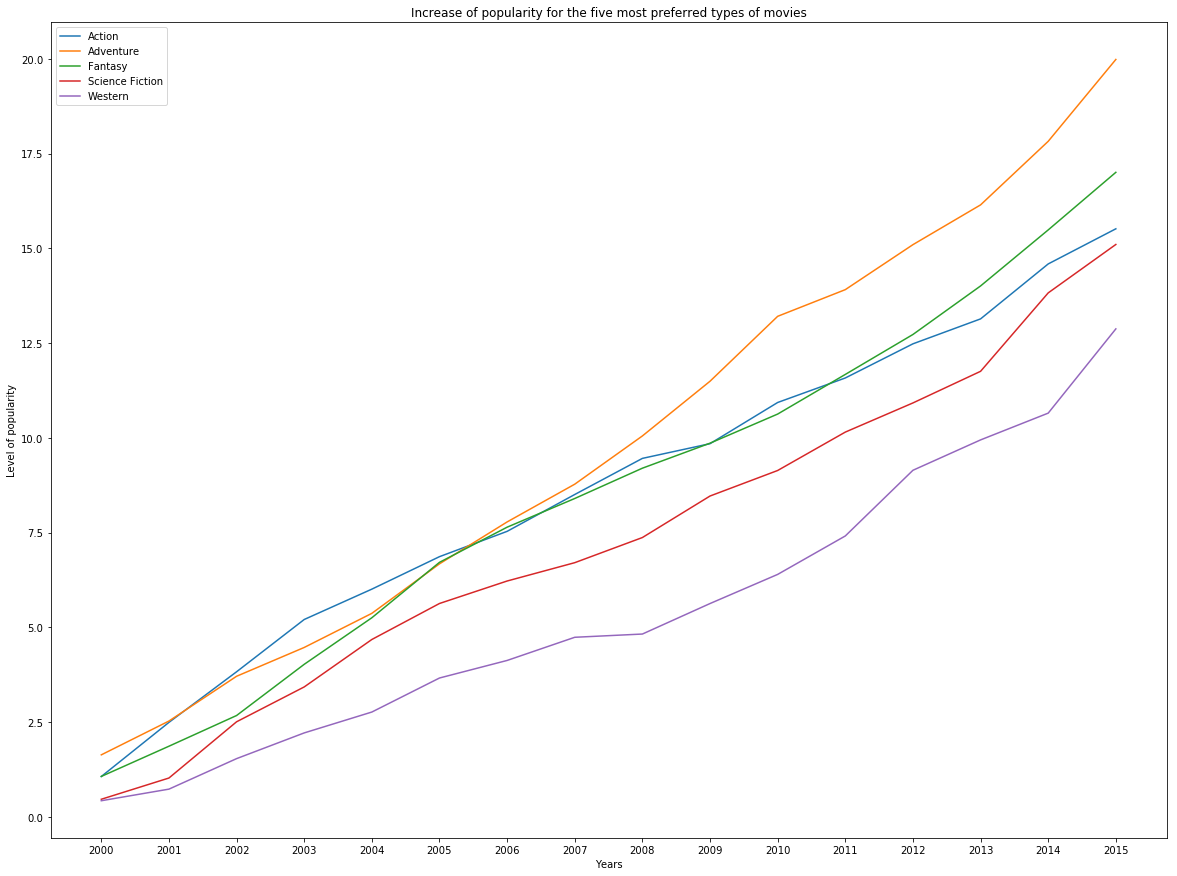

In [81]:
plt.subplots(figsize=(20,15));
plt.plot(year,popularity_action,label="Action");
plt.plot(year,popularity_adventure,label="Adventure");
plt.plot(year,popularity_fantasy,label="Fantasy");
plt.plot(year,popularity_fiction,label="Science Fiction");
plt.plot(year,popularity_western,label="Western");
plt.legend(loc='best');
plt.title("Increase of popularity for the five most preferred types of movies");
plt.xlabel('Years');
plt.ylabel('Level of popularity');
names = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks(x,names);

### Question 2: What is the proportion of movies making a profit?

In [82]:
# Let's first explore the data
df_qn.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [83]:
# We can now group movies by budget and revenue
profitability_movies = df_qn.groupby('original_title')['budget','revenue'].sum()

In [84]:
# We will add an additional column related to the net income
profitability_movies['net_income'] = profitability_movies['revenue']-profitability_movies['budget']

In [85]:
# We can calculate the proportion of movies making a loss
total = profitability_movies['net_income'].count()
loss = profitability_movies['net_income'][profitability_movies['net_income']<0].count() / total

In [103]:
# We can calculate the proportion of movies making a profit
profit = profitability_movies['net_income'][profitability_movies['net_income']>=0].count() / total

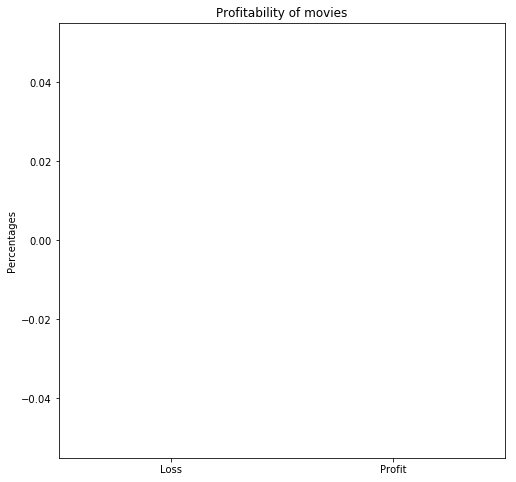

In [88]:
# Finally we can create a bar chart to visualize the end results.
plt.subplots(figsize=(8,8))
plt.bar([1,1.06],[loss,profit],width=0.05,color=['r','g']);
plt.title("Profitability of movies");
plt.ylabel("Percentages");
plt.xticks([1,1.06],("Loss","Profit"));

<a id='conclusions'></a>
## Conclusions

> To the first question Adventure and Fantasy movies became the most popular types of movies for the last 15 years up to 2015. One reason could be the increase of technology making these types of movies more attractive.
<br> It is interesting to note that Western movies are still in the top 5 of the most popular movies.<p><p>
    
> On the second question of our project we can see that the probability to make a profit for a movie production is 70%. The risk ot make a loss is quite high given that actors and productors would usually be professionals.